In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/copd.csv")

# Prepare features and target
X = df.drop(columns=["uid", "class", "label"])  # Drop non-informative columns
y = df["label"]

In [3]:
# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)


In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [5]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Get feature importance
feature_importances = rf.feature_importances_
feature_names = X.columns

In [7]:
# Sort features by importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

<ipython-input-9-8571258749b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


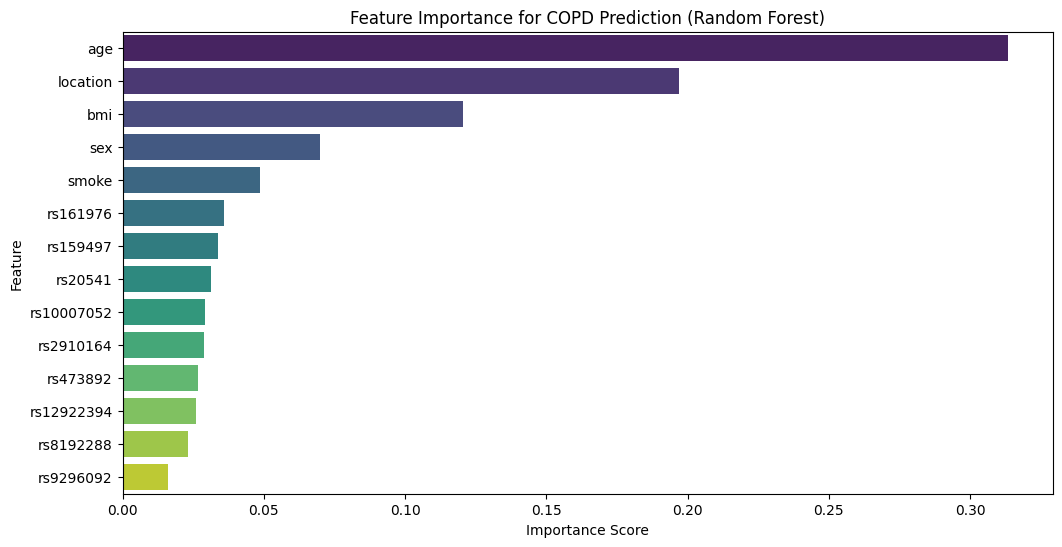

       Feature  Importance
1          age    0.313492
4     location    0.196933
2          bmi    0.120341
0          sex    0.070013
3        smoke    0.048575
10    rs161976    0.035794
12    rs159497    0.033616
7      rs20541    0.031420
5   rs10007052    0.029082
9    rs2910164    0.028883


In [9]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance for COPD Prediction (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Display top features
print(feature_importance_df.head(10))

In [11]:
# Define models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="linear"),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

In [12]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:56:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [13]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
4              XGBoost  0.897638   0.913043  0.943820  0.928177
0  Logistic Regression  0.850394   0.880435  0.910112  0.895028
2                 k-NN  0.850394   0.850000  0.955056  0.899471
1        Decision Tree  0.834646   0.925000  0.831461  0.875740
3                  SVM  0.826772   0.852632  0.910112  0.880435


In [14]:
# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

# Evaluate Neural Network
nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Accuracy: 0.8031


In [17]:
# Train and evaluate models
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="linear", probability=True),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Train and evaluate models
results = []
roc_curves = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve

    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    })

    # Store ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[name] = (fpr, tpr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:00:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [18]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
4              XGBoost  0.897638   0.913043  0.943820  0.928177  0.937907
0  Logistic Regression  0.850394   0.880435  0.910112  0.895028  0.887936
2                 k-NN  0.850394   0.850000  0.955056  0.899471  0.829095
3                  SVM  0.826772   0.852632  0.910112  0.880435  0.888527
1        Decision Tree  0.818898   0.902439  0.831461  0.865497  0.810467


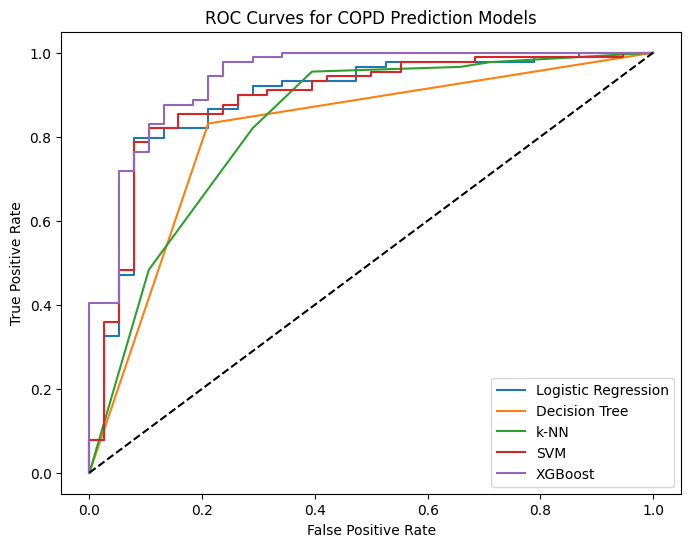

In [19]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=name)
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for COPD Prediction Models")
plt.legend()
plt.show()

In [20]:
# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train Neural Network
nn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Evaluate Neural Network
nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7264 - loss: 0.5761 - val_accuracy: 0.7638 - val_loss: 0.4994
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7391 - loss: 0.5872 - val_accuracy: 0.7874 - val_loss: 0.4499
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8191 - loss: 0.4277 - val_accuracy: 0.7953 - val_loss: 0.4572
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7639 - loss: 0.4905 - val_accuracy: 0.7953 - val_loss: 0.4449
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8280 - loss: 0.4414 - val_accuracy: 0.8346 - val_loss: 0.4642
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8077 - loss: 0.4475 - val_accuracy: 0.7559 - val_loss: 0.5717
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7775 - loss: 0.4901 - val_accuracy: 0.8346 - val_loss: 0.4457
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8088 - loss: 0.4428 - val_accuracy: 0.8110 - val_loss